In [ ]:
!pip install mlxtend

#Import & Data Cleansing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import NMF

In [ ]:
df = pd.read_csv('Prod_Rec.csv')
df.head(20)

,Timestamp,โปรแกรมแท้,เครื่องซักผ้า,NONE,รองเท้าวิ่ง,ผักกรอบ,คอร์สเรียนเสริม,nintendo switch,BTC (Bitcoin),mechanical keyboard,เครื่องดูดฝุ่น Dyson,เคส ipad,คุณเคยซื้อโต๊ะปรับระดับหรือไม่,สินค้าจากพิมรี่พาย,I PHONE 13,"หูฟัง bluetooth (airpods,truewireless)",แก้วน้ำ Starbucks,เบาะรองนั่ง,เครื่องชงกาแฟแคปซูล,ตั๋วเครื่องบินไปญี่ปุ่น,Ebook,ตู้เย็น,กล้องฟิล์ม,เครื่องดนตรี,whey protein,วัตถุมงคล,กระบองเพชรพูดได้,ROV Skin
0,10/28/2021 14:05,NaN,NaN,NaN,1,1,1,0,0,0,0,1,0,0,0,0,0.0,0,0,0,1,0,0,1,0,1,0,0
1,10/28/2021 14:06,NaN,NaN,NaN,1,0,1,1,1,1,0,1,0,0,0,1,0.0,1,0,0,1,0,1,0,1,0,0,1
2,10/28/2021 14:06,NaN,NaN,NaN,1,0,1,0,1,0,0,1,0,0,0,1,1.0,1,0,1,0,0,0,1,0,0,0,0
3,10/28/2021 14:06,NaN,NaN,NaN,1,0,1,0,1,0,1,1,0,1,0,1,0.0,1,0,1,1,1,0,1,0,0,0,0
4,10/28/2021 14:06,NaN,NaN,NaN,1,1,1,0,0,0,0,1,0,1,0,1,0.0,1,0,1,0,0,0,0,0,0,0,0
5,10/28/2021 14:06,NaN,NaN,NaN,1,0,0,0,1,0,0,1,0,0,0,1,0.0,0,0,0,1,1,0,1,0,1,0,1
6,10/28/2021 14:06,NaN,NaN,NaN,1,1,1,0,0,0,0,0,0,0,0,1,0.0,0,0,0,0,1,0,0,0,1,0,0
7,10/28/2021 14:06,NaN,NaN,NaN,1,0,1,0,0,0,0,1,0,0,0,1,1.0,1,0,1,0,0,0,1,0,0,0,1
8,10/28/2021 14:06,NaN,NaN,0.0,1,1,1,1,0,0,0,1,0,0,0,1,0.0,1,0,0,1,0,0,1,0,0,0,0
9,10/28/2021 14:06,0.0,NaN,1.0,1,0,1,1,1,1,0,1,0,0,0,1,1.0,0,0,1,1,0,0,0,0,0,0,0


In [ ]:
# remove first 2 rows, drop timestamp
prep = df.iloc[:,4:].reset_index(drop=True).rename_axis('student').copy()
prep.head(20)

,รองเท้าวิ่ง,ผักกรอบ,คอร์สเรียนเสริม,nintendo switch,BTC (Bitcoin),mechanical keyboard,เครื่องดูดฝุ่น Dyson,เคส ipad,คุณเคยซื้อโต๊ะปรับระดับหรือไม่,สินค้าจากพิมรี่พาย,I PHONE 13,"หูฟัง bluetooth (airpods,truewireless)",แก้วน้ำ Starbucks,เบาะรองนั่ง,เครื่องชงกาแฟแคปซูล,ตั๋วเครื่องบินไปญี่ปุ่น,Ebook,ตู้เย็น,กล้องฟิล์ม,เครื่องดนตรี,whey protein,วัตถุมงคล,กระบองเพชรพูดได้,ROV Skin
student,,,,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,0,0,0,0,1,0,0,0,0,0.0,0,0,0,1,0,0,1,0,1,0,0
1,1,0,1,1,1,1,0,1,0,0,0,1,0.0,1,0,0,1,0,1,0,1,0,0,1
2,1,0,1,0,1,0,0,1,0,0,0,1,1.0,1,0,1,0,0,0,1,0,0,0,0
3,1,0,1,0,1,0,1,1,0,1,0,1,0.0,1,0,1,1,1,0,1,0,0,0,0
4,1,1,1,0,0,0,0,1,0,1,0,1,0.0,1,0,1,0,0,0,0,0,0,0,0
5,1,0,0,0,1,0,0,1,0,0,0,1,0.0,0,0,0,1,1,0,1,0,1,0,1
6,1,1,1,0,0,0,0,0,0,0,0,1,0.0,0,0,0,0,1,0,0,0,1,0,0
7,1,0,1,0,0,0,0,1,0,0,0,1,1.0,1,0,1,0,0,0,1,0,0,0,1
8,1,1,1,1,0,0,0,1,0,0,0,1,0.0,1,0,0,1,0,0,1,0,0,0,0


In [ ]:
# check unique values, and NaN
prep.melt()['value'].value_counts(dropna=False)

0.0    443
1.0    252
NaN      1
Name: value, dtype: int64

In [ ]:
#Impute nan -> 0
prep.fillna(0, inplace=True)
prep.isna().any().sum()

0

In [ ]:
prep.columns

Index(['รองเท้าวิ่ง', 'ผักกรอบ', 'คอร์สเรียนเสริม', 'nintendo switch',
       'BTC (Bitcoin)', 'mechanical keyboard', 'เครื่องดูดฝุ่น Dyson',
       'เคส ipad', 'คุณเคยซื้อโต๊ะปรับระดับหรือไม่', 'สินค้าจากพิมรี่พาย',
       'I PHONE 13', 'หูฟัง bluetooth (airpods,truewireless)',
       'แก้วน้ำ Starbucks', 'เบาะรองนั่ง', 'เครื่องชงกาแฟแคปซูล',
       'ตั๋วเครื่องบินไปญี่ปุ่น', 'Ebook', 'ตู้เย็น', 'กล้องฟิล์ม',
       'เครื่องดนตรี', 'whey protein', 'วัตถุมงคล ', 'กระบองเพชรพูดได้',
       'ROV Skin'],
      dtype='object')

In [ ]:
prep.isnull().sum()

รองเท้าวิ่ง                               0
ผักกรอบ                                   0
คอร์สเรียนเสริม                           0
nintendo switch                           0
BTC (Bitcoin)                             0
mechanical keyboard                       0
เครื่องดูดฝุ่น Dyson                      0
เคส ipad                                  0
คุณเคยซื้อโต๊ะปรับระดับหรือไม่            0
สินค้าจากพิมรี่พาย                        0
I PHONE 13                                0
หูฟัง bluetooth (airpods,truewireless)    0
แก้วน้ำ Starbucks                         0
เบาะรองนั่ง                               0
เครื่องชงกาแฟแคปซูล                       0
ตั๋วเครื่องบินไปญี่ปุ่น                   0
Ebook                                     0
ตู้เย็น                                   0
กล้องฟิล์ม                                0
เครื่องดนตรี                              0
whey protein                              0
วัตถุมงคล                                 0
กระบองเพชรพูดได้                

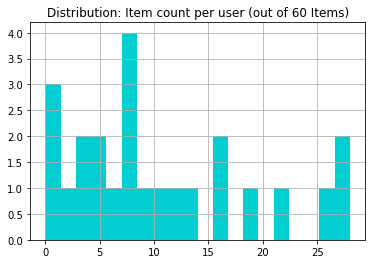

In [ ]:
prep.sum().hist(bins=20, color='darkturquoise')
plt.title('Distribution: Item count per user (out of 60 Items)')
plt.show()

#Market Basket Analysis

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(prep, min_support=0.05, use_colnames=True)
frequent_itemsets.head()

,support,itemsets
0,0.965517,(รองเท้าวิ่ง)
1,0.344828,(ผักกรอบ)
2,0.931034,(คอร์สเรียนเสริม)
3,0.241379,(nintendo switch)
4,0.448276,(BTC (Bitcoin))


In [ ]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ผักกรอบ),(รองเท้าวิ่ง),0.344828,0.965517,0.344828,1.000000,1.035714,0.011891,inf
1,(รองเท้าวิ่ง),(ผักกรอบ),0.965517,0.344828,0.344828,0.357143,1.035714,0.011891,1.019157
2,(รองเท้าวิ่ง),(nintendo switch),0.965517,0.241379,0.241379,0.250000,1.035714,0.008323,1.011494
3,(nintendo switch),(รองเท้าวิ่ง),0.241379,0.965517,0.241379,1.000000,1.035714,0.008323,inf
4,(รองเท้าวิ่ง),(BTC (Bitcoin)),0.965517,0.448276,0.448276,0.464286,1.035714,0.015458,1.029885
5,(BTC (Bitcoin)),(รองเท้าวิ่ง),0.448276,0.965517,0.448276,1.000000,1.035714,0.015458,inf
6,(รองเท้าวิ่ง),(mechanical keyboard),0.965517,0.172414,0.172414,0.178571,1.035714,0.005945,1.007496
7,(mechanical keyboard),(รองเท้าวิ่ง),0.172414,0.965517,0.172414,1.000000,1.035714,0.005945,inf
8,(รองเท้าวิ่ง),(เครื่องดูดฝุ่น Dyson),0.965517,0.068966,0.068966,0.071429,1.035714,0.002378,1.002653
9,(เครื่องดูดฝุ่น Dyson),(รองเท้าวิ่ง),0.068966,0.965517,0.068966,1.000000,1.035714,0.002378,inf


In [ ]:
rules[ (rules['lift'] >= 1) &
       (rules['confidence'] >= 0.5) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
45,(whey protein),(ผักกรอบ),0.206897,0.344828,0.137931,0.666667,1.933333,0.066587,1.965517
70,(mechanical keyboard),(nintendo switch),0.172414,0.241379,0.103448,0.600000,2.485714,0.061831,1.896552
74,(nintendo switch),"(หูฟัง bluetooth (airpods,truewireless))",0.241379,0.758621,0.241379,1.000000,1.318182,0.058264,inf
83,(nintendo switch),(Ebook),0.241379,0.655172,0.206897,0.857143,1.308271,0.048751,2.413793
85,(กล้องฟิล์ม),(nintendo switch),0.172414,0.241379,0.103448,0.600000,2.485714,0.061831,1.896552
...,...,...,...,...,...,...,...,...,...
389549,"(mechanical keyboard, เบาะรองนั่ง)","(รองเท้าวิ่ง, ตั๋วเครื่องบินไปญี่ปุ่น, ผักกรอบ...",0.103448,0.068966,0.068966,0.666667,9.666667,0.061831,2.793103
389550,"(mechanical keyboard, ตั๋วเครื่องบินไปญี่ปุ่น)","(รองเท้าวิ่ง, ผักกรอบ, เครื่องดนตรี, เคส ipad,...",0.103448,0.068966,0.068966,0.666667,9.666667,0.061831,2.793103
389558,"(ผักกรอบ, ตั๋วเครื่องบินไปญี่ปุ่น)","(รองเท้าวิ่ง, mechanical keyboard, เครื่องดนตร...",0.103448,0.068966,0.068966,0.666667,9.666667,0.061831,2.793103
389561,"(whey protein, ตู้เย็น)","(รองเท้าวิ่ง, mechanical keyboard, ผักกรอบ, เค...",0.103448,0.068966,0.068966,0.666667,9.666667,0.061831,2.793103


In [ ]:
ABSOLUTE = rules[rules['confidence'] ==  1]
ABSOLUTEHEAD10 = ABSOLUTE.head(10).sort_values(by=['lift'],ascending=False)

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
item_item_matrix = pd.DataFrame(index=prep.columns,columns=prep.columns)

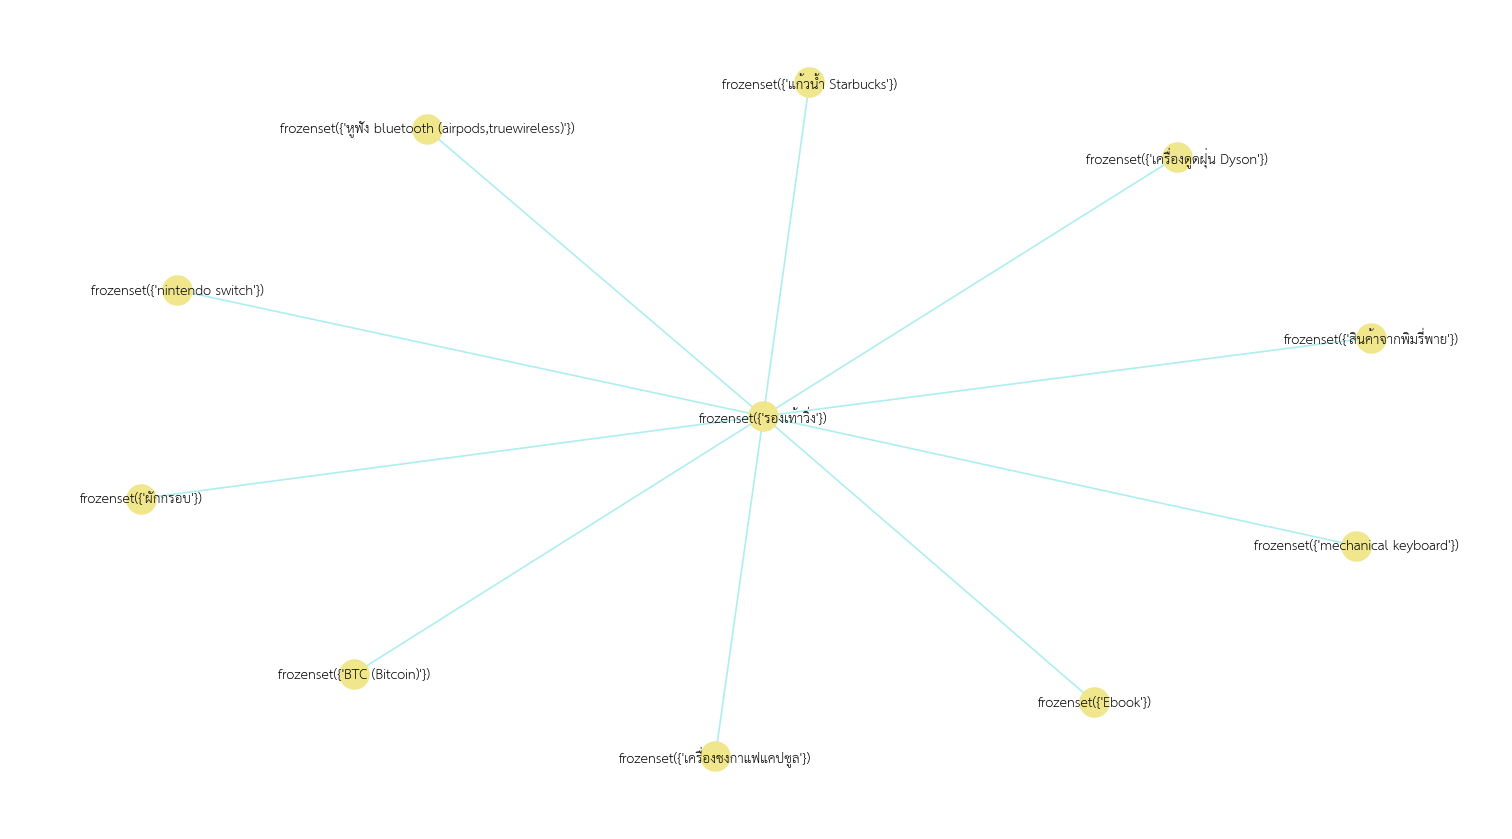

In [ ]:
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('THSarabunNew.ttf')
mpl.rc('font',family='TH Sarabun New',size=20)

plt.rcParams['font.family'] ='TH Sarabun New'
labels_params = {'font_family': 'TH Sarabun New', 'alpha':1, 'font_size':12, 'font_color':"black",'font_weight':500,'edge_color':'paleturquoise','node_color':'khaki'}
fig, ax=plt.subplots(figsize=[16,9],dpi=120)
GA=nx.from_pandas_edgelist(ABSOLUTEHEAD10,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True, **labels_params)
plt.show()

# Collaborative Filtering

In [ ]:
from scipy.spatial.distance import cosine

for i in range(0,len(item_item_matrix.columns)) :
    # Loop through the columns for each column
    for j in range(0,len(item_item_matrix.columns)) :
      # Fill in placeholder with cosine similarities
      item_item_matrix.iloc[i,j] = 1 -cosine(prep.iloc[:,i],prep.iloc[:,j])

/usr/local/lib/python3.7/dist-packages/scipy/spatial/distance.py:720: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


In [ ]:
links = item_item_matrix.rename_axis('related item', axis='columns').stack().reset_index()
links.columns = ['item', 'related item','value']
links.head()

,item,related item,value
0,รองเท้าวิ่ง,รองเท้าวิ่ง,1
1,รองเท้าวิ่ง,ผักกรอบ,0.597614
2,รองเท้าวิ่ง,คอร์สเรียนเสริม,0.945611
3,รองเท้าวิ่ง,nintendo switch,0.5
4,รองเท้าวิ่ง,BTC (Bitcoin),0.681385


In [ ]:
links_filtered=links.loc[ (links['value'] > 0.1) & 
                         (links['item'] != links['related item']) ]
links_filtered.head()

,item,related item,value
1,รองเท้าวิ่ง,ผักกรอบ,0.597614
2,รองเท้าวิ่ง,คอร์สเรียนเสริม,0.945611
3,รองเท้าวิ่ง,nintendo switch,0.5
4,รองเท้าวิ่ง,BTC (Bitcoin),0.681385
5,รองเท้าวิ่ง,mechanical keyboard,0.422577


In [ ]:
import matplotlib as mpl
mpl.__version__

'3.2.2'

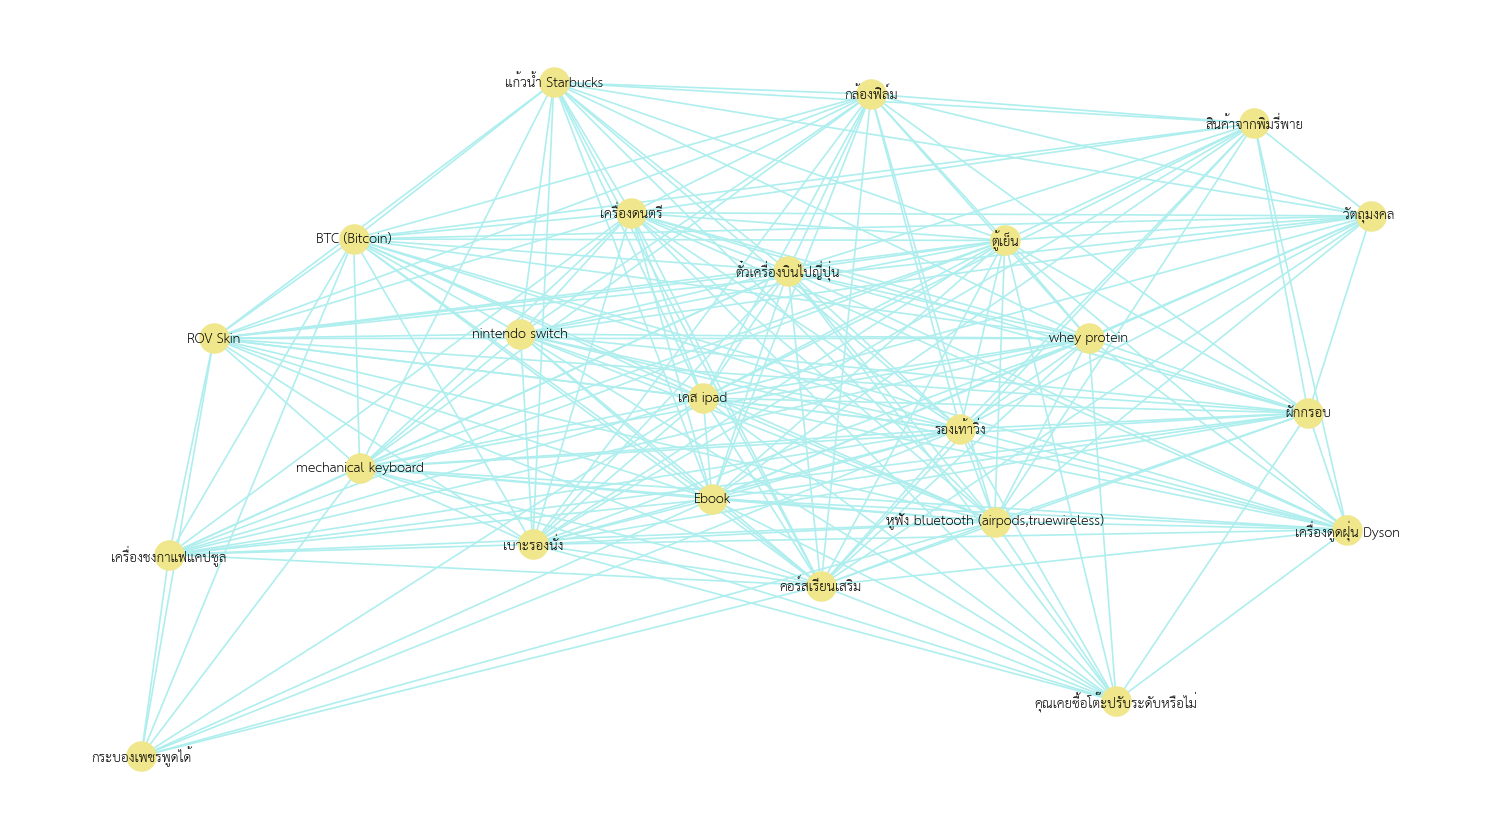

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

import matplotlib as mpl
mpl.font_manager.fontManager.addfont('THSarabunNew.ttf')
mpl.rc('font',family='TH Sarabun New',size=20)

plt.rcParams['font.family'] ='TH Sarabun New'
labels_params = {'font_family': 'TH Sarabun New', 'alpha':1, 'font_size':12, 'font_color':"black",'font_weight':500,'edge_color':'paleturquoise','node_color':'khaki'}
fig, ax=plt.subplots(figsize=[16,9],dpi=120)
GA=nx.from_pandas_edgelist(links_filtered,source='item',target='related item')
nx.draw(GA,with_labels=True, **labels_params)
plt.show()